In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import scipy.stats as stats

In [2]:
import statsmodels.api as sm 

In [3]:
combined_df= pd.read_csv("C:/Users/sarah/Downloads/causal_inference_dataset.csv")

In [4]:
data = combined_df.loc[:, ~combined_df.columns.str.startswith('pct') & 
                   ~combined_df.columns.str.contains('_ed_|_rt_|housing_') ]
data

,Unnamed: 0.1,Unnamed: 0,year_of,fips_code,state,county,state_code,county_type,hh_median_income,home_own_hh_median_income,...,amt_grant,rurality_pct,county_class,hs_gte_hs_degree,grant_amount_per_household,treatment_variable,county_class_Exurban,county_class_Rural,county_class_Suburban,county_class_Urban
0,0,0,2021,0500000US01051,Alabama,Elmore County,AL,Large,59032.0,70162.0,...,87455.0,46.0,Exurban,0.894543,2.723776,1,1.0,0.0,0.0,0.0
1,1,1,2021,0500000US01073,Alabama,Jefferson County,AL,Large,55006.0,73199.0,...,5213523.0,31.0,Urban,0.920810,19.298837,1,0.0,0.0,0.0,1.0
2,2,2,2021,0500000US01083,Alabama,Limestone County,AL,Large,66796.0,91630.0,...,31352.0,45.0,Exurban,0.869411,0.770603,0,1.0,0.0,0.0,0.0
3,3,3,2021,0500000US01089,Alabama,Madison County,AL,Large,78525.0,96065.0,...,1484538.0,35.0,Urban,0.951621,9.024931,1,0.0,0.0,0.0,1.0
4,4,4,2021,0500000US01095,Alabama,Marshall County,AL,Large,50191.0,60585.0,...,314.0,45.0,Exurban,0.845041,0.008721,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37706,37706,3138,2011,0500000US56019,Wyoming,Johnson County,WY,Small,55094.0,60314.0,...,0.0,62.0,Rural,0.925877,0.000000,0,0.0,1.0,0.0,0.0
37707,37707,3139,2011,0500000US56009,Wyoming,Converse County,WY,Small,56673.0,66493.0,...,0.0,59.0,Rural,0.927580,0.000000,0,0.0,1.0,0.0,0.0
37708,37708,3140,2011,0500000US56039,Wyoming,Teton County,WY,Small,73627.0,96478.0,...,0.0,57.0,Rural,0.983699,0.000000,0,0.0,1.0,0.0,0.0
37709,37709,3141,2011,0500000US56005,Wyoming,Campbell County,WY,Small,78356.0,86636.0,...,0.0,56.0,Rural,0.931128,0.000000,0,0.0,1.0,0.0,0.0


In [5]:
# Identify columns that start with 'home_own_' and 'rent_'
home_own_cols = [col for col in data.columns if col.startswith('home_own_')]
rent_cols = [col for col in data.columns if col.startswith('rent_')]

# Create new combined columns by summing matching pairs
for home_col in home_own_cols:
    suffix = home_col.replace('home_own_', '')  # Extract the suffix (xyz)
    
    # Skip processing for median_income columns
    if suffix == "median_income":
        continue
    
    rent_col = f"rent_{suffix}"  # Corresponding rent column
    
    if rent_col in data.columns:  # Ensure the rent column exists
        data[f"combined_{suffix}"] = data[home_col] + data[rent_col]

# Optionally, drop the original columns if you no longer need them
data.drop(columns=[col for col in home_own_cols + rent_cols if "median_income" not in col], inplace=True)
data

C:\Users\sarah\AppData\Local\Temp\ipykernel_27956\666049289.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"combined_{suffix}"] = data[home_col] + data[rent_col]
C:\Users\sarah\AppData\Local\Temp\ipykernel_27956\666049289.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"combined_{suffix}"] = data[home_col] + data[rent_col]
C:\Users\sarah\AppData\Local\Temp\ipykernel_27956\666049289.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,Unnamed: 0.1,Unnamed: 0,year_of,fips_code,state,county,state_code,county_type,hh_median_income,home_own_hh_median_income,...,combined_hh_inc_015_020k,combined_hh_inc_020_025k,combined_hh_inc_025_035k,combined_hh_inc_035_050k,combined_hh_inc_050_075k,combined_hh_inc_075_100k,combined_hh_inc_100_150k,combined_hh_inc_150k_ge,combined_children_present,combined_children_absent
0,0,0,2021,0500000US01051,Alabama,Elmore County,AL,Large,59032.0,70162.0,...,1931.0,792.0,2878.0,5953.0,4602.0,4235.0,5975.0,2582.0,7326.0,24782.0
1,1,1,2021,0500000US01073,Alabama,Jefferson County,AL,Large,55006.0,73199.0,...,13699.0,13317.0,22849.0,36015.0,48386.0,30497.0,34635.0,35156.0,60025.0,210122.0
2,2,2,2021,0500000US01083,Alabama,Limestone County,AL,Large,66796.0,91630.0,...,2602.0,920.0,3111.0,4440.0,7033.0,4277.0,7149.0,7547.0,12397.0,28288.0
3,3,3,2021,0500000US01089,Alabama,Madison County,AL,Large,78525.0,96065.0,...,4831.0,4555.0,10054.0,19778.0,24920.0,24314.0,27927.0,34758.0,43819.0,120674.0
4,4,4,2021,0500000US01095,Alabama,Marshall County,AL,Large,50191.0,60585.0,...,1670.0,2756.0,3473.0,5092.0,6493.0,3801.0,3958.0,3817.0,10032.0,25971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37706,37706,3138,2011,0500000US56019,Wyoming,Johnson County,WY,Small,55094.0,60314.0,...,77.0,201.0,291.0,673.0,893.0,488.0,395.0,255.0,856.0,2940.0
37707,37707,3139,2011,0500000US56009,Wyoming,Converse County,WY,Small,56673.0,66493.0,...,258.0,346.0,658.0,673.0,1216.0,971.0,790.0,298.0,1528.0,4163.0
37708,37708,3140,2011,0500000US56039,Wyoming,Teton County,WY,Small,73627.0,96478.0,...,173.0,309.0,597.0,959.0,1345.0,1196.0,1239.0,1093.0,1673.0,5647.0
37709,37709,3141,2011,0500000US56005,Wyoming,Campbell County,WY,Small,78356.0,86636.0,...,332.0,432.0,1162.0,1727.0,3469.0,3290.0,3798.0,1524.0,6006.0,10577.0


In [6]:
analysis_data = data[(data['year_of'] == 2019) | (data['year_of'] == 2022)].copy()
wide_df = analysis_data.pivot(index=['county', 'fips_code', 'state', 'rurality_pct', 'county_class', 'county_class_Exurban', 'county_class_Rural', 'county_class_Suburban', 'county_class_Urban'], columns='year_of', values=[
    'hh_median_income',
    'combined_hispanic',
    'home_own_hh_median_income',
    'vacant',
    'unemployed',
    'home_value_0000_0049k',
    'combined_black',
    'rent_hh_median_income',
    'combined_hh_inc_025_035k',
    'home_value_0200_0299k',
    'combined_hh_inc_035_050k',
    'combined_hh_size_6',
    'personal_income',
    'combined_hh_inc_050_075k',
    'combined_hh_inc_000_005k',
    'combined_age_35_44',
    'combined_age_35_lt',
    'combined_age_45_54',
    'combined_children_present',
    'grant_amount_per_household',
    'hs_gte_hs_degree',
    'treatment_variable']).reset_index()
wide_df

county       fips_code           state rurality_pct  \
year_of                                                                  
0        Abbeville County  0500000US45001  South Carolina         52.0   
1           Acadia Parish  0500000US22001       Louisiana         48.0   
2         Accomack County  0500000US51001        Virginia         51.0   
3              Ada County  0500000US16001           Idaho         38.0   
4            Adair County  0500000US19001            Iowa         57.0   
...                   ...             ...             ...          ...   
3148          Yuma County  0500000US04027         Arizona         47.0   
3149          Yuma County  0500000US08125        Colorado         60.0   
3150        Zapata County  0500000US48505           Texas         56.0   
3151        Zavala County  0500000US48507           Texas         58.0   
3152       Ziebach County  0500000US46137    South Dakota         64.0   

        county_class county_class_Exurban county_class_Rural  \
year_of                                                        
0              Rural                  0.0                1.0   
1            Exurban                  1.0                0.0   
2              Rural                  0.0                1.0   
3           Suburban                  0.0                0.0   
4              Rural                  0.0                1.0   
...              ...                  ...                ...   
3148         Exurban                  1.0                0.0   
3149           Rural                  0.0                1.0   
3150           Rural                  0.0                1.0   
3151           Rural                  0.0                1.0   
3152           Rural                  0.0                1.0   

        county_class_Suburban county_class_Urban hh_median_income  ...  \
year_of                                                      2019  ...   
0                         0.0                0.0          38741.0  ...   
1                         0.0                0.0          43396.0  ...   
2                         0.0                0.0          46073.0  ...   
3                         1.0                0.0          72021.0  ...   
4                         0.0                0.0          53363.0  ...   
...                       ...                ...              ...  ...   
3148                      0.0                0.0          46419.0  ...   
3149                      0.0                0.0          52022.0  ...   
3150                      0.0                0.0          33952.0  ...   
3151                      0.0                0.0          34459.0  ...   
3152                      0.0                0.0          37400.0  ...   

        combined_age_45_54          combined_children_present           \
year_of               2019     2022                      2019     2022   
0                   1833.0   1672.0                    2052.0   1987.0   
1                   3560.0   3709.0                    6884.0   6553.0   
2                   2166.0   2271.0                    2580.0   2808.0   
3                  33608.0  36551.0                   52646.0  58464.0   
4                    417.0    459.0                     707.0    759.0   
...                    ...      ...                       ...      ...   
3148               11800.0  12156.0                   21727.0  23703.0   
3149                 690.0    790.0                    1203.0   1415.0   
3150                 844.0    790.0                    1849.0   1983.0   
3151                 468.0    430.0                    1076.0   1155.0   
3152                 156.0    134.0                     230.0    170.0   

        grant_amount_per_household      hs_gte_hs_degree            \
year_of                       2019 2022             2019      2022   
0                         0.000000  0.0         0.832176  0.874079   
1                         0.387879  0.0         0.805747  0.816466   
2                

In [7]:
wide_df.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in wide_df.columns]
wide_df

,county,fips_code,state,rurality_pct,county_class,county_class_Exurban,county_class_Rural,county_class_Suburban,county_class_Urban,hh_median_income_2019,...,combined_age_45_54_2019,combined_age_45_54_2022,combined_children_present_2019,combined_children_present_2022,grant_amount_per_household_2019,grant_amount_per_household_2022,hs_gte_hs_degree_2019,hs_gte_hs_degree_2022,treatment_variable_2019,treatment_variable_2022
0,Abbeville County,0500000US45001,South Carolina,52.0,Rural,0.0,1.0,0.0,0.0,38741.0,...,1833.0,1672.0,2052.0,1987.0,0.000000,0.0,0.832176,0.874079,0.0,0.0
1,Acadia Parish,0500000US22001,Louisiana,48.0,Exurban,1.0,0.0,0.0,0.0,43396.0,...,3560.0,3709.0,6884.0,6553.0,0.387879,0.0,0.805747,0.816466,0.0,0.0
2,Accomack County,0500000US51001,Virginia,51.0,Rural,0.0,1.0,0.0,0.0,46073.0,...,2166.0,2271.0,2580.0,2808.0,10.709586,0.0,0.832405,0.825332,1.0,0.0
3,Ada County,0500000US16001,Idaho,38.0,Suburban,0.0,0.0,1.0,0.0,72021.0,...,33608.0,36551.0,52646.0,58464.0,13.152161,0.0,0.959883,0.967048,1.0,0.0
4,Adair County,0500000US19001,Iowa,57.0,Rural,0.0,1.0,0.0,0.0,53363.0,...,417.0,459.0,707.0,759.0,0.000000,0.0,0.965087,0.977150,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,Yuma County,0500000US04027,Arizona,47.0,Exurban,1.0,0.0,0.0,0.0,46419.0,...,11800.0,12156.0,21727.0,23703.0,0.330893,0.0,0.755706,0.775418,0.0,0.0
3149,Yuma County,0500000US08125,Colorado,60.0,Rural,0.0,1.0,0.0,0.0,52022.0,...,690.0,790.0,1203.0,1415.0,23.779819,0.0,0.890267,0.890369,1.0,0.0
3150,Zapata County,0500000US48505,Texas,56.0,Rural,0.0,1.0,0.0,0.0,33952.0,...,844.0,790.0,1849.0,1983.0,0.000000,0.0,0.626249,0.692023,0.0,0.0
3151,Zavala County,0500000US48507,Texas,58.0,Rural,0.0,1.0,0.0,0.0,34459.0,...,468.0,430.0,1076.0,1155.0,0.000000,0.0,0.659078,0.785754,0.0,0.0


In [8]:
wide_df.isna().sum()
wide_df.replace([float('inf'), -float('inf')], pd.NA).isna().sum()
wide_df = wide_df.fillna(0)  

In [9]:
treatment = "treatment_variable_2019"
outcome = "hs_gte_hs_degree_2022"

In [10]:
confounders = ['hh_median_income_2019',
 'combined_hispanic_2019',
 'home_own_hh_median_income_2019', 
 'vacant_2019', 
 'rurality_pct',
 'unemployed_2019',
 'home_value_0000_0049k_2019', 
 'combined_black_2019', 
 'rent_hh_median_income_2019', 
 'combined_hh_inc_025_035k_2019',
 'home_value_0200_0299k_2019', 
 'combined_hh_inc_035_050k_2019', 
 'combined_hh_size_6_2019', 
 'personal_income_2019', 
 'combined_hh_inc_050_075k_2019', 
 'combined_hh_inc_000_005k_2019', 
 'combined_age_35_44_2019', 
 'combined_age_35_lt_2019', 
 'combined_age_45_54_2019', 
 'county_class_Rural']

In [11]:
data = wide_df[confounders+[treatment, outcome]]

In [12]:
data.head()

,hh_median_income_2019,combined_hispanic_2019,home_own_hh_median_income_2019,vacant_2019,rurality_pct,unemployed_2019,home_value_0000_0049k_2019,combined_black_2019,rent_hh_median_income_2019,combined_hh_inc_025_035k_2019,...,combined_hh_size_6_2019,personal_income_2019,combined_hh_inc_050_075k_2019,combined_hh_inc_000_005k_2019,combined_age_35_44_2019,combined_age_35_lt_2019,combined_age_45_54_2019,county_class_Rural,treatment_variable_2019,hs_gte_hs_degree_2022
0,38741.0,84.0,44830.0,2522.0,52.0,323.0,1525.0,2845.0,23665.0,1178.0,...,65.0,849281.0,1958.0,386.0,1281.0,1260.0,1833.0,1.0,0.0,0.874079
1,43396.0,326.0,57163.0,4418.0,48.0,1240.0,2650.0,3731.0,19691.0,2292.0,...,569.0,2297185.0,3146.0,811.0,4165.0,3699.0,3560.0,0.0,0.0,0.816466
2,46073.0,590.0,55671.0,8066.0,51.0,570.0,930.0,3547.0,32251.0,1783.0,...,216.0,1593013.0,2410.0,356.0,1642.0,1467.0,2166.0,1.0,1.0,0.825332
3,72021.0,10663.0,86905.0,8486.0,38.0,6064.0,4938.0,1269.0,46611.0,15641.0,...,5183.0,26328997.0,34823.0,2950.0,34675.0,37657.0,33608.0,0.0,1.0,0.967048
4,53363.0,34.0,63977.0,526.0,57.0,101.0,337.0,31.0,30403.0,360.0,...,73.0,369640.0,602.0,76.0,440.0,621.0,417.0,1.0,0.0,0.977150


# Calculating IPW using Logistic Regression

In [13]:
X = data[confounders]
T = data[treatment]
Y = data[outcome]

# Propensity Score Modeling

We use **logistic regression** to estimate propensity scores:

$$
\text{e(x)} = P(\text{Grant Received} = 1 \mid \text{Covariates})
$$

- Covariates are standardized to improve convergence.
- Increase `max_iter` to 5000 for stability.

This step gives each county a predicted probability of receiving the grant based on its baseline characteristics.


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ps_model = LogisticRegression(max_iter=5000)
ps_model.fit(X_scaled, T)
data.loc[:, 'propensity_score'] = ps_model.predict_proba(X_scaled)[:, 1]



C:\Users\sarah\AppData\Local\Temp\ipykernel_27956\236724471.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'propensity_score'] = ps_model.predict_proba(X_scaled)[:, 1]


## Calculating Inverse Probability Weights

We first compute **raw IPW weights**:

$$
\text{Weight} = \frac{T}{e(x)} + \frac{1 - T}{1 - e(x)}
$$

This reweights data to balance treated and control groups on observed covariates.

We visualize weight distribution to check for extreme values.


In [15]:
data['ipw_raw'] = T / data['propensity_score'] + (1 - T) / (1 - data['propensity_score'])

C:\Users\sarah\AppData\Local\Temp\ipykernel_27956\112343146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ipw_raw'] = T / data['propensity_score'] + (1 - T) / (1 - data['propensity_score'])


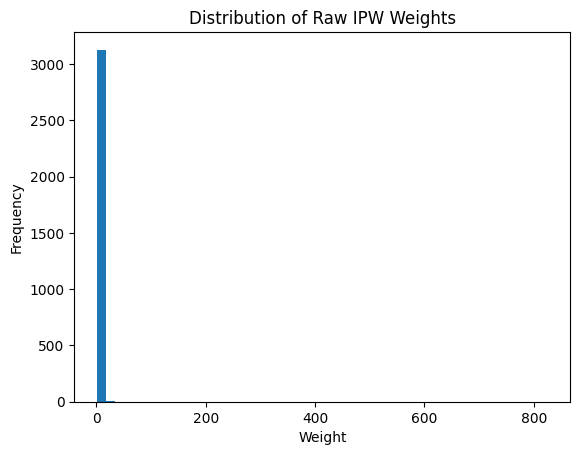

In [16]:
plt.hist(data['ipw_raw'], bins=50)
plt.title('Distribution of Raw IPW Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


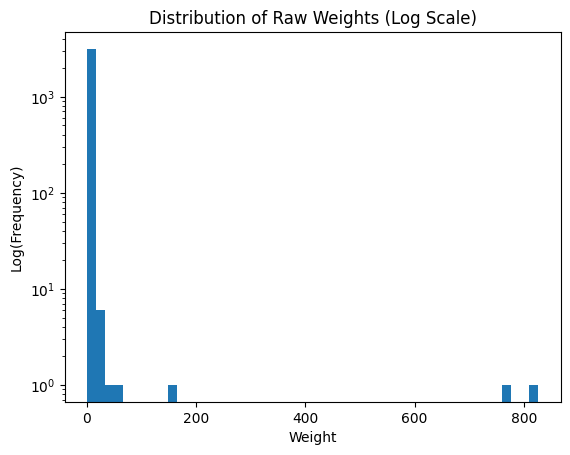

In [17]:
plt.hist(data['ipw_raw'], bins=50, log=True)
plt.title('Distribution of Raw Weights (Log Scale)')
plt.xlabel('Weight')
plt.ylabel('Log(Frequency)')
plt.show()

## Stabilized Weights

Raw weights can be highly variable, especially with propensity scores near 0 or 1.

We compute **stabilized weights**:

$$
\text{Weight} = \frac{P(T=1)}{e(x)} \text{ for treated}, \quad \frac{P(T=0)}{1 - e(x)} \text{ for controls}
$$

This reduces variance while maintaining balance.


In [18]:
p_treat = T.mean()
data['ipw_stabilized'] = T * p_treat / data['propensity_score'] + (1 - T) * (1 - p_treat) / (1 - data['propensity_score'])

C:\Users\sarah\AppData\Local\Temp\ipykernel_27956\359818653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ipw_stabilized'] = T * p_treat / data['propensity_score'] + (1 - T) * (1 - p_treat) / (1 - data['propensity_score'])


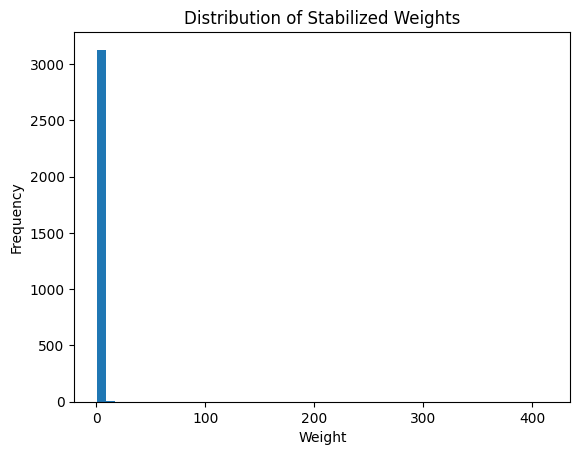

In [19]:
plt.hist(data['ipw_stabilized'], bins=50)
plt.title('Distribution of Stabilized Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

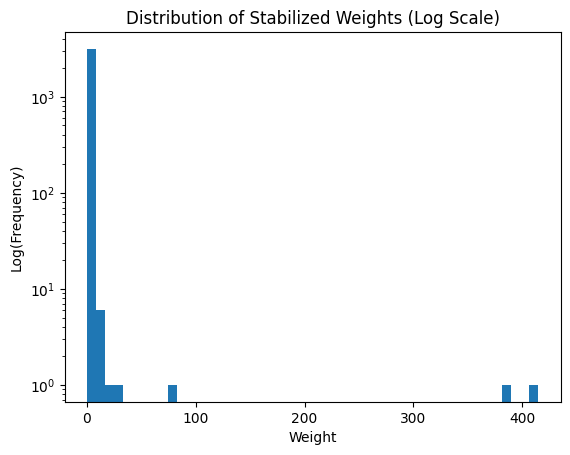

In [20]:
plt.hist(data['ipw_stabilized'], bins=50, log=True)
plt.title('Distribution of Stabilized Weights (Log Scale)')
plt.xlabel('Weight')
plt.ylabel('Log(Frequency)')
plt.show()

In [21]:
import numpy as np

## Truncating Extreme Weights

We cap weights at the 99th percentile to avoid a few observations dominating the estimation.

This step improves stability and reduces sensitivity to extreme values.


In [22]:
cap_value = np.percentile(data['ipw_stabilized'], 99)
data['ipw_final'] = np.minimum(data['ipw_stabilized'], cap_value)

C:\Users\sarah\AppData\Local\Temp\ipykernel_27956\2491634985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ipw_final'] = np.minimum(data['ipw_stabilized'], cap_value)


## Diagnosing Overlap

We plot **propensity score distributions** to check for common support.

Counties with propensity scores near 0 or 1 indicate poor overlap between treated and control groups, suggesting they have no good counterfactual.


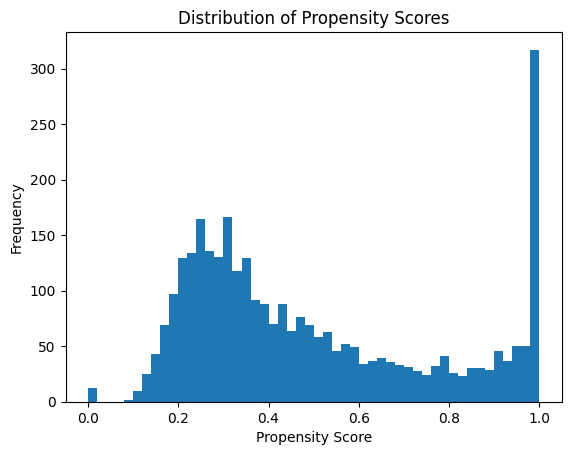

In [23]:
plt.hist(data['propensity_score'], bins=50)
plt.title("Distribution of Propensity Scores")
plt.xlabel("Propensity Score")
plt.ylabel("Frequency")
plt.show()


## Trimming for Common Support

We exclude counties with **propensity scores < 0.05 or > 0.95**.

This step ensures we're estimating causal effects only in regions with meaningful overlap between treated and control units.


In [24]:
trimmed_data = data[
    (data['propensity_score'] > 0.05) &
    (data['propensity_score'] < 0.95)
].copy()

print(trimmed_data.shape)


(2742, 26)


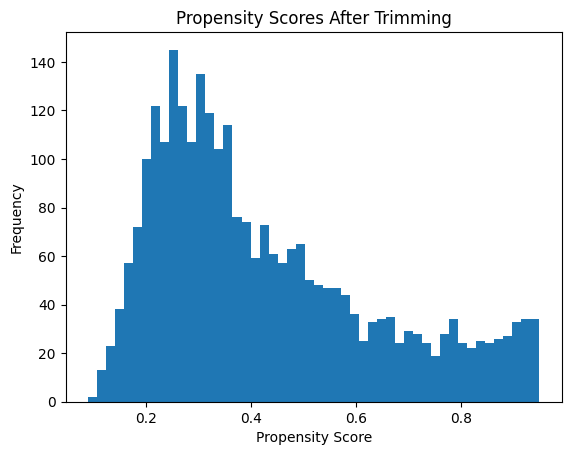

In [25]:
plt.hist(trimmed_data['propensity_score'], bins=50)
plt.title('Propensity Scores After Trimming')
plt.xlabel('Propensity Score')
plt.ylabel('Frequency')
plt.show()


## Recalculating Weights After Trimming

After trimming, we recompute stabilized weights and again truncate extreme values.

We then visualize the distribution to ensure weights are well-behaved.


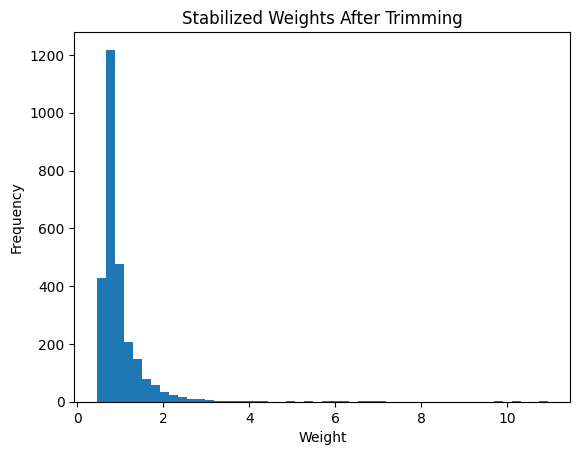

In [26]:
T_trim = trimmed_data[treatment]
p_treat_trim = T_trim.mean()

trimmed_data['ipw_stabilized'] = (
    T_trim * p_treat_trim / trimmed_data['propensity_score']
    + (1 - T_trim) * (1 - p_treat_trim) / (1 - trimmed_data['propensity_score'])
)

plt.hist(trimmed_data['ipw_stabilized'], bins=50)
plt.title('Stabilized Weights After Trimming')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


## Estimating the Average Treatment Effect (ATE)

We run a **weighted least squares regression**:

$$
\text{Graduation\_2022} = \beta_0 + \beta_1 \times \text{Grant\_2019} + \epsilon
$$

using the final stabilized and truncated weights.

The coefficient on `Grant_2019` is our **causal effect estimate**.


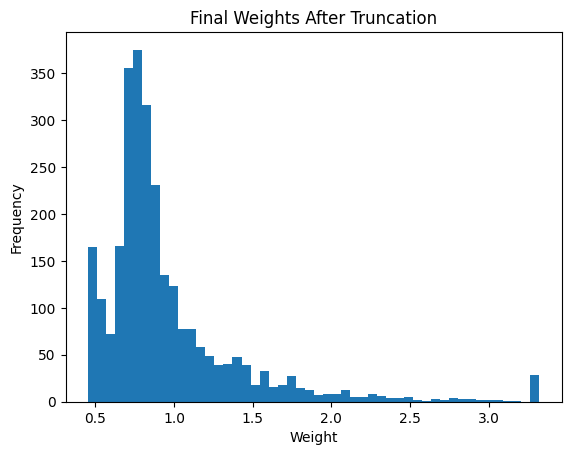

In [27]:
cap_value = np.percentile(trimmed_data['ipw_stabilized'], 99)
trimmed_data['ipw_final'] = np.minimum(trimmed_data['ipw_stabilized'], cap_value)

plt.hist(trimmed_data['ipw_final'], bins=50)
plt.title('Final Weights After Truncation')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


### IPW + WLS

In [28]:
X_reg = sm.add_constant(trimmed_data[treatment])
wls_model = sm.WLS(trimmed_data[outcome], X_reg, weights=trimmed_data['ipw_final'])
result = wls_model.fit()

print(result.summary())


                              WLS Regression Results                             
Dep. Variable:     hs_gte_hs_degree_2022   R-squared:                       0.004
Model:                               WLS   Adj. R-squared:                  0.004
Method:                    Least Squares   F-statistic:                     11.75
Date:                   Fri, 08 Aug 2025   Prob (F-statistic):           0.000617
Time:                           14:47:28   Log-Likelihood:                 3743.2
No. Observations:                   2742   AIC:                            -7482.
Df Residuals:                       2740   BIC:                            -7471.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

After adjusting for baseline differences via inverse probability weighting, counties that received the grant in 2019 had about 0.78 percentage points higher high school graduation rates in 2022 than they would have otherwise.

In [29]:
residuals = result.resid


In [30]:
residuals

0      -0.020375
1      -0.077988
2      -0.076957
4       0.082695
5      -0.011694
          ...   
3147   -0.047743
3149   -0.011919
3150   -0.202432
3151   -0.108701
3152    0.018153
Length: 2742, dtype: float64

In [31]:
fitted_values = result.fittedvalues


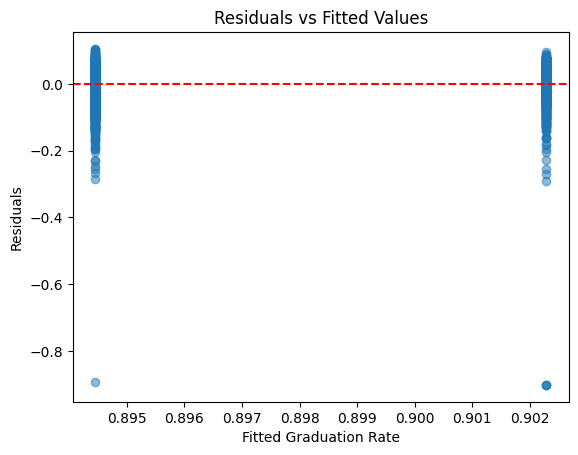

In [32]:
import matplotlib.pyplot as plt

plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Graduation Rate')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


### IPW + Mean Difference

In [39]:
df = trimmed_data.copy()


treatment = "treatment_variable_2019"
outcome = "hs_gte_hs_degree_2022"
weight = "ipw_final"

def compute_ipw_ate(df):
    treated = df[df[treatment] == 1]
    control = df[df[treatment] == 0]

    treated_mean = (treated[outcome] * treated[weight]).sum() / treated[weight].sum()
    control_mean = (control[outcome] * control[weight]).sum() / control[weight].sum()

    return treated_mean - control_mean

# Bootstrap for confidence interval
boot_ates = []
for _ in range(1000):
    sample = resample(df)
    boot_ates.append(compute_ipw_ate(sample))

boot_ates = np.array(boot_ates)
mean_ate = boot_ates.mean()
std_ate = boot_ates.std(ddof=1)
ci_lower = np.percentile(boot_ates, 2.5)
ci_upper = np.percentile(boot_ates, 97.5)
t_stat = mean_ate / std_ate
p_value = 2 * (1 - stats.norm.cdf(abs(t_stat)))


treated = df[df[treatment] == 1]
control = df[df[treatment] == 0]

control_mean = (control[outcome] * control[weight]).sum() / control[weight].sum()
ATE = (treated[outcome] * treated[weight]).sum() / treated[weight].sum() - control_mean

df["y_pred"] = control_mean + ATE * df[treatment]
residuals = df[outcome] - df["y_pred"]
wss_resid = (df[weight] * residuals**2).sum()

weighted_mean_y = (df[outcome] * df[weight]).sum() / df[weight].sum()
total_resid = df[outcome] - weighted_mean_y
wss_total = (df[weight] * total_resid**2).sum()

r_squared = 1 - wss_resid / wss_total


print("\n IPW ATE Stats (No Regression):\n")
print(f"ATE (bootstrapped):        {mean_ate:.4f}")
print(f"Standard Error:            {std_ate:.4f}")
print(f"t-statistic:               {t_stat:.4f}")
print(f"p-value:                   {p_value:.4f}")
print(f"95% Confidence Interval:   [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Weighted R-squared:        {r_squared:.4f}")



 IPW ATE Stats (No Regression):

ATE (bootstrapped):        0.0079
Standard Error:            0.0025
t-statistic:               3.1283
p-value:                   0.0018
95% Confidence Interval:   [0.0028, 0.0126]
Weighted R-squared:        0.0043
